In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data loading 
df = pd.read_csv('../data/raw/data_cleaned.csv')
df = df.drop('Unnamed: 0', axis=1)

In [3]:
df

,Przychody ogółem,Liczba zatrudnionych,Stan/Województwo,Forma prawna,Notowane/Nienotowane,Zysk z działalności operacyjnej,Zysk brutto,Podatek dochodowy,Zysk netto,Zysk netto (strata netto),...,Rzeczowe aktywa trwałe/Aktywa razem (%),Zobowiązania krótkoterminowe/Zobowiązania ogółem (%),Kapitalizacja rynkowa,Zaudytowany,Skonsolidowane,KRS,default,into_default,Industry,Wiek firmy (lata)
0,4999399.0,175.5,mazowieckie,Spółka jawna,Niegiełdowe,202235.0,198052.0,0.00,198052.03,198052.0,...,6.56,100.00,0.0,Niezaudytowany,Indywidualnie,35506.0,0,1,handel,21.0
1,4998554.0,250.0,warmińsko-mazurskie,Spółka z ograniczoną odpowiedzialnością,Niegiełdowe,38864.0,40832.0,0.00,40831.89,40832.0,...,37.60,78.63,0.0,Zaudytowany,Indywidualnie,179215.0,0,0,produkcja,19.0
2,4998286.0,175.5,wielkopolskie,Spółka jawna,Niegiełdowe,281356.0,277164.0,56154.75,221009.17,221009.0,...,34.13,100.00,0.0,Niezaudytowany,Indywidualnie,77577.0,0,0,inne,21.0
3,4997935.0,250.0,łódzkie,Spółka z ograniczoną odpowiedzialnością,Niegiełdowe,209978.0,261974.0,52204.75,209769.37,209769.0,...,2.97,100.00,0.0,Niezaudytowany,Indywidualnie,129715.0,0,0,handel,20.0
4,4997497.0,175.5,pomorskie,Spółka z ograniczoną odpowiedzialnością,Niegiełdowe,754739.0,630333.0,136474.74,493858.18,493858.0,...,73.42,23.53,0.0,Niezaudytowany,Indywidualnie,108188.0,0,0,inne,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42478,5003831.0,300.5,wielkopolskie,Spółka z ograniczoną odpowiedzialnością,Niegiełdowe,532994.0,567584.0,54711.79,512871.82,512872.0,...,0.10,100.00,0.0,Zaudytowany,Indywidualnie,635344.0,0,0,inne,6.0
42479,5001399.0,35.5,wielkopolskie,Spółka z ograniczoną odpowiedzialnością,Niegiełdowe,110008.0,102640.0,44711.65,57928.60,57929.0,...,37.34,35.85,0.0,Niezaudytowany,Indywidualnie,396386.0,0,0,handel,11.0
42480,5000760.0,96.0,małopolskie,Spółka jawna,Niegiełdowe,977740.0,916661.0,175757.53,740903.12,740903.0,...,44.07,100.00,0.0,Zaudytowany,Indywidualnie,66667.0,0,0,produkcja,21.0
42481,5000395.0,22.0,łódzkie,Spółka z ograniczoną odpowiedzialnością,Niegiełdowe,84190.0,15565.0,8823.92,6740.64,6741.0,...,21.33,98.27,0.0,Zaudytowany,Indywidualnie,162645.0,0,0,handel,19.0


In [4]:
# Basic info
basic_info = {
    "Number of observations": df.shape[0],
    "Number of columns": df.shape[1],
    "Data type": df.dtypes.to_dict(),
    "Number of missings": df.isnull().sum().sum(),
}

# First few rows 
sample_rows = df.head()

# Target distribution
target_distribution = df["into_default"].value_counts(normalize=True)

# Statistics for numerical variables 
num_summary = df.describe()

# Checking missings for each columns 
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]  # Displaying only columns with missings 

# Results print
basic_info, sample_rows, target_distribution, num_summary, missing_values

({'Number of observations': 42483,
  'Number of columns': 54,
  'Data type': {'Przychody ogółem': dtype('float64'),
   'Liczba zatrudnionych': dtype('float64'),
   'Stan/Województwo': dtype('O'),
   'Forma prawna': dtype('O'),
   'Notowane/Nienotowane': dtype('O'),
   'Zysk z działalności operacyjnej': dtype('float64'),
   'Zysk brutto': dtype('float64'),
   'Podatek dochodowy': dtype('float64'),
   'Zysk netto': dtype('float64'),
   'Zysk netto (strata netto)': dtype('float64'),
   'Aktywa ogółem': dtype('float64'),
   'Gotówka i ekwiwalenty': dtype('float64'),
   'Kapitał własny ogółem': dtype('float64'),
   'Kapitał własny spółki dominującej': dtype('float64'),
   'Wyemitowany kapitał': dtype('float64'),
   'Udziały skarbu państwa': dtype('float64'),
   'Zobowiązania ogółem': dtype('float64'),
   'Stopa zwrotu z aktywów (%)': dtype('float64'),
   'Zannualizowana stopa zwrotu z aktywów (ROA) (%)': dtype('float64'),
   'Stopa zwrotu z kapitału własnego (ROE) (%)': dtype('float64'),
  

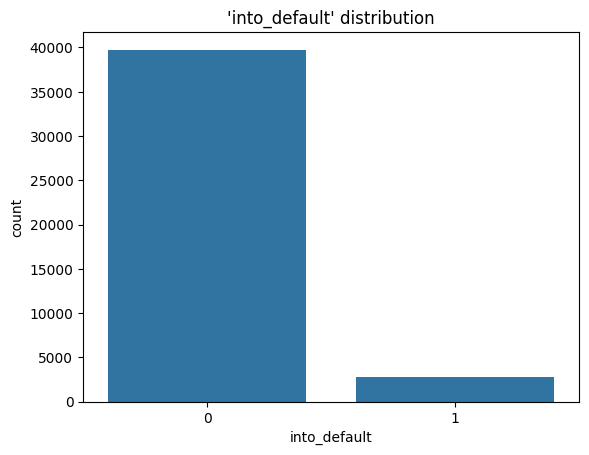

In [5]:
# Target distribution 
sns.countplot(x=df['into_default'])
plt.title("'into_default' distribution")
plt.show()

In [6]:
# Separating numerical and categorical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Excluding the target variable from the lists
numerical_features = [col for col in numerical_features if col != 'class']
categorical_features = [col for col in categorical_features if col != 'class']

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['Przychody ogółem', 'Liczba zatrudnionych', 'Zysk z działalności operacyjnej', 'Zysk brutto', 'Podatek dochodowy', 'Zysk netto', 'Zysk netto (strata netto)', 'Aktywa ogółem', 'Gotówka i ekwiwalenty', 'Kapitał własny ogółem', 'Kapitał własny spółki dominującej', 'Wyemitowany kapitał', 'Udziały skarbu państwa', 'Zobowiązania ogółem', 'Stopa zwrotu z aktywów (%)', 'Zannualizowana stopa zwrotu z aktywów (ROA) (%)', 'Stopa zwrotu z kapitału własnego (ROE) (%)', 'Zannualizowana stopa zwrotu z kapitału własnego (%)', 'Zwrot z kapitału zaangażowanego (%)', 'Operacyjny wskaźnik rentowności aktywów (%)', 'Obrót aktywów bieżących (x)', 'Wskaźnik rotacji aktywów (x)', 'Wskaźnik rotacji kapitału obrotowego (x)', 'Wartość księgowa', 'Wartość przedsiębiorstwa', 'Gotówka netto', 'Dług', 'Zadłużenie długoterminowe', 'Zadłużenie krótkoterminowe', 'Dług netto', 'Kapitał obrotowy', 'ROCE (Kapitał zaangażowany)', 'Wskaźnik ogólnego zadłużenia (%)', 'Wskaźnik długu do kapitału (%)', 'Za

In [7]:
# Correlation of numerical features with target variable 
correlation_matrix = df[numerical_features].corr()
default_corr = correlation_matrix['into_default'].sort_values(ascending=False)
print("Korelacje ze zmienną 'into_default':")
print(default_corr)

Korelacje ze zmienną 'into_default':
into_default                                                       1.000000
Zadłużenie długoterminowe/Kapitał Zaangażowany (%)                 0.069926
KRS                                                                0.061051
Zobowiązania ogółem                                                0.025848
Stopa zwrotu z aktywów (%)                                         0.025009
Zannualizowana stopa zwrotu z aktywów (ROA) (%)                    0.025009
Operacyjny wskaźnik rentowności aktywów (%)                        0.022245
Dług netto                                                         0.020674
Zwrot z kapitału zaangażowanego (%)                                0.018798
Zobowiązania krótkoterminowe/Zobowiązania ogółem (%)               0.017295
Dług                                                               0.011976
Zadłużenie krótkoterminowe                                         0.011824
Stopa zwrotu z kapitału własnego (ROE) (%)         

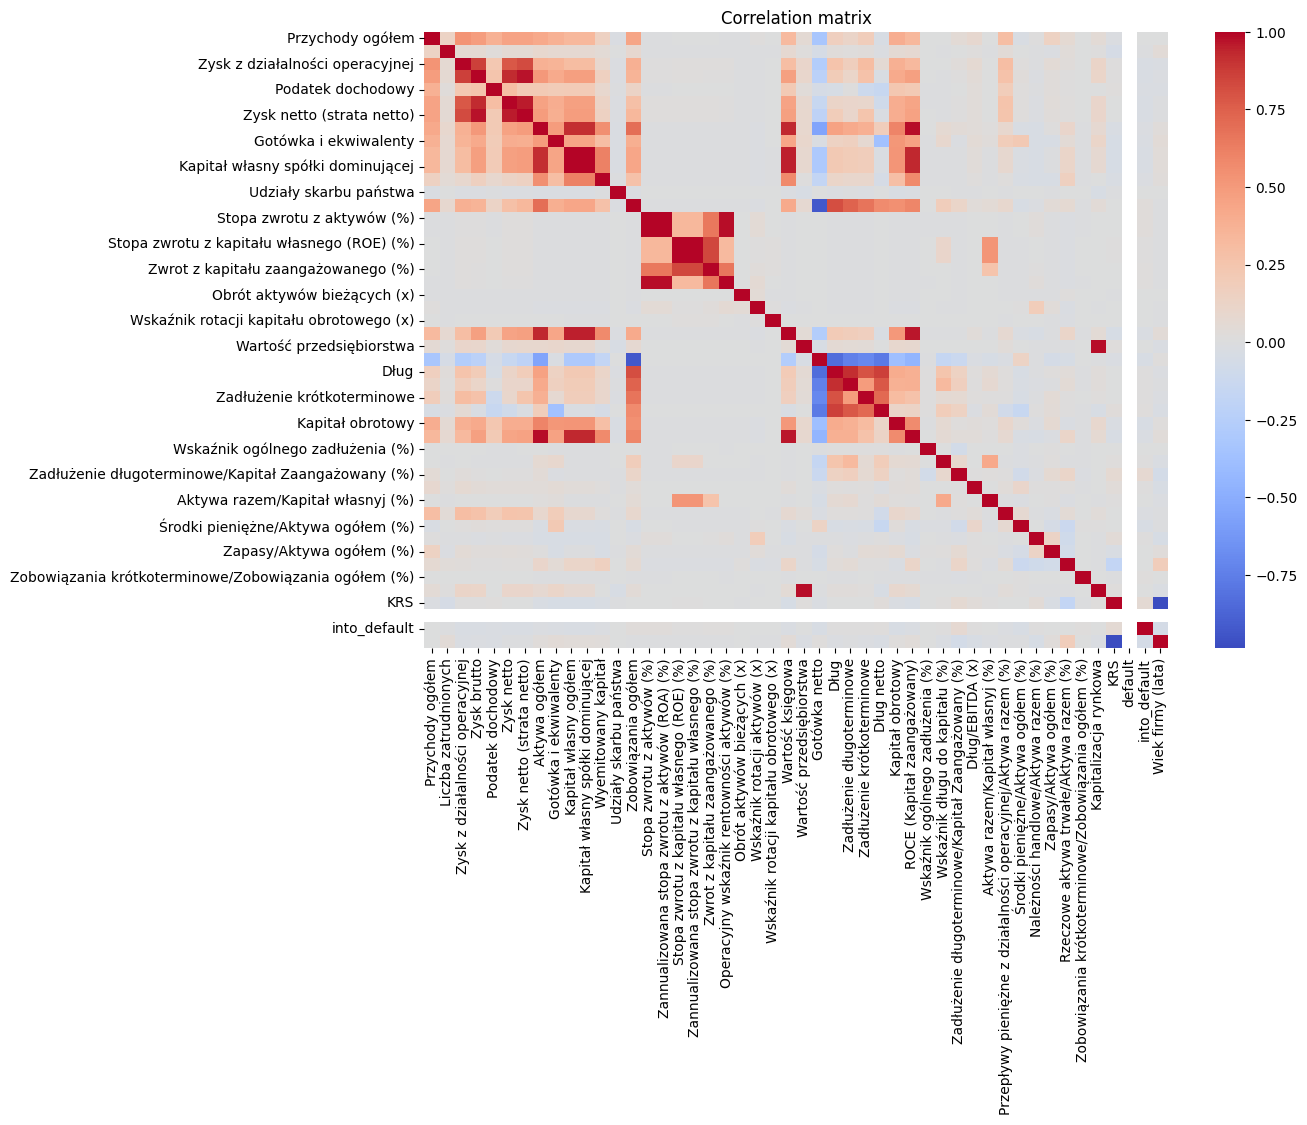

In [8]:
# Correlation visualization 
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation matrix")
plt.show()

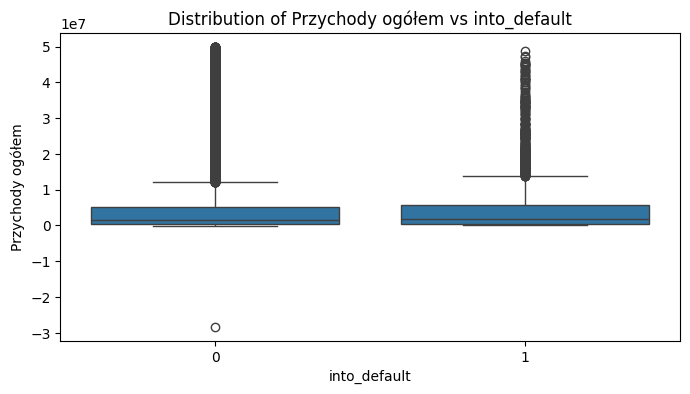

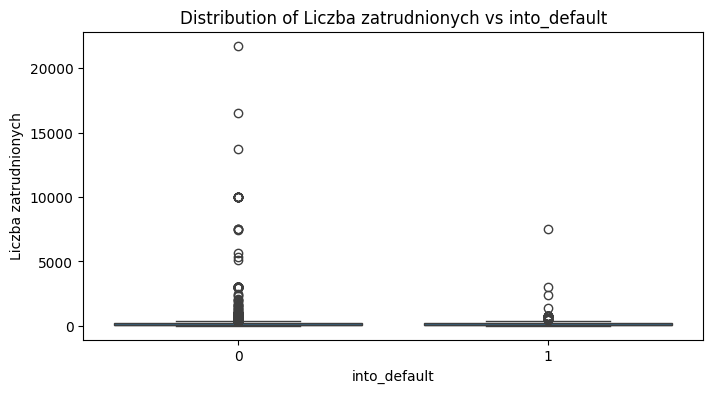

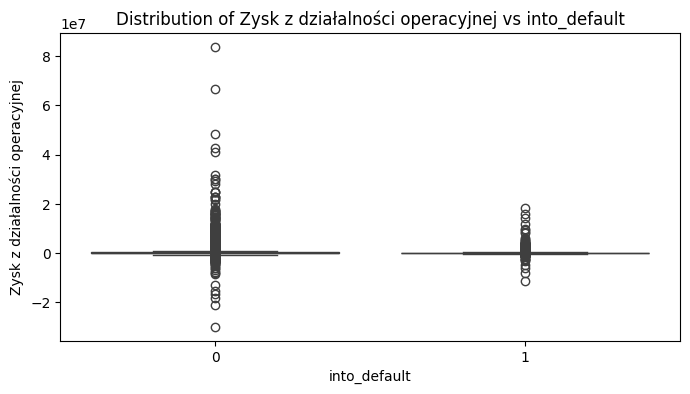

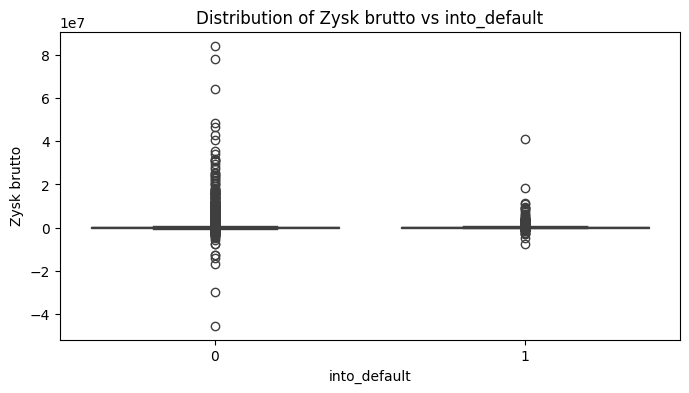

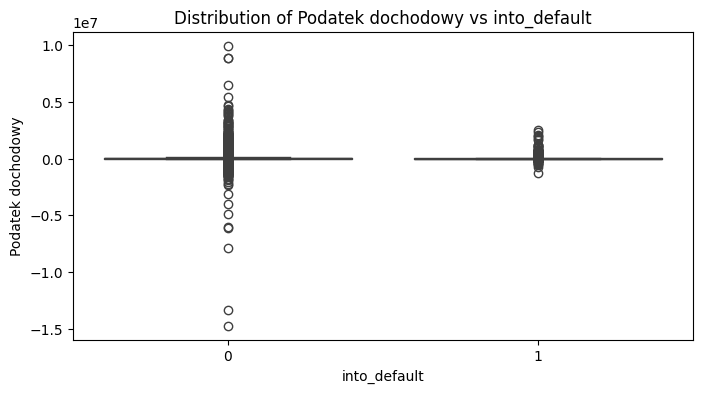

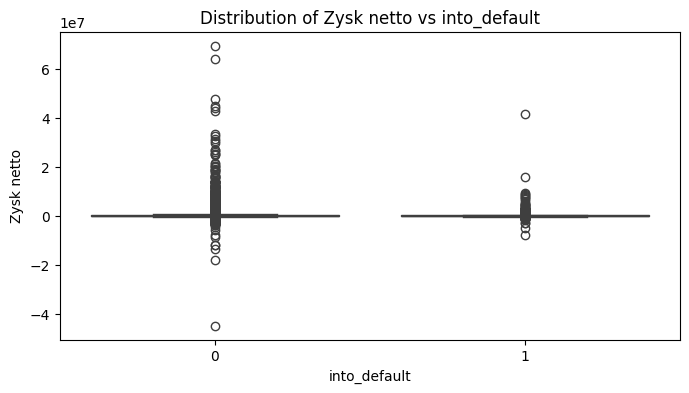

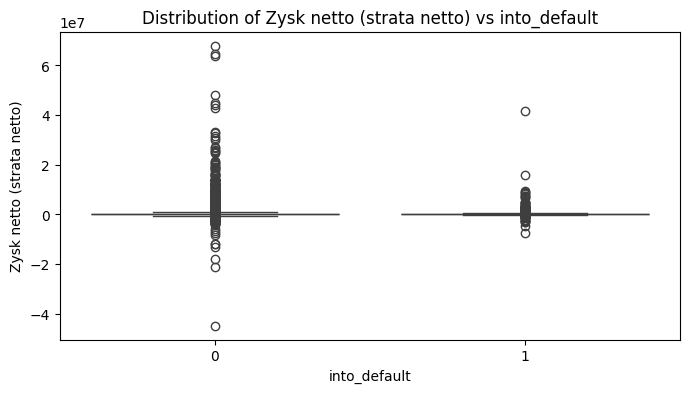

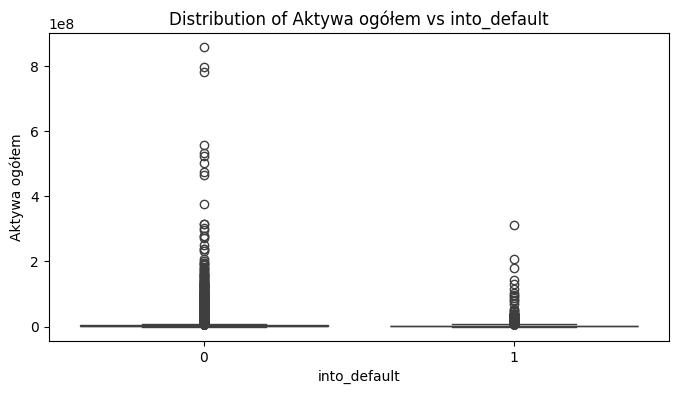

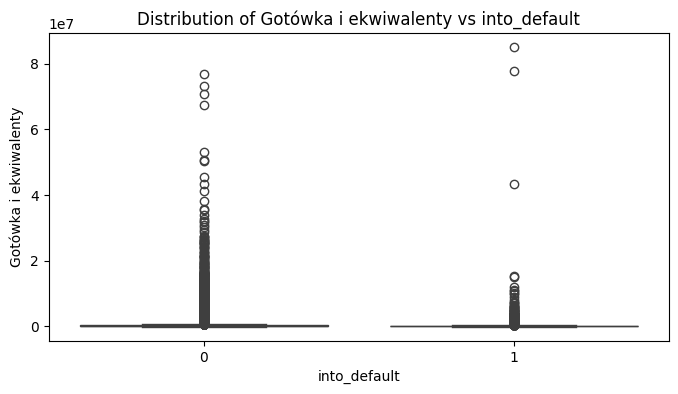

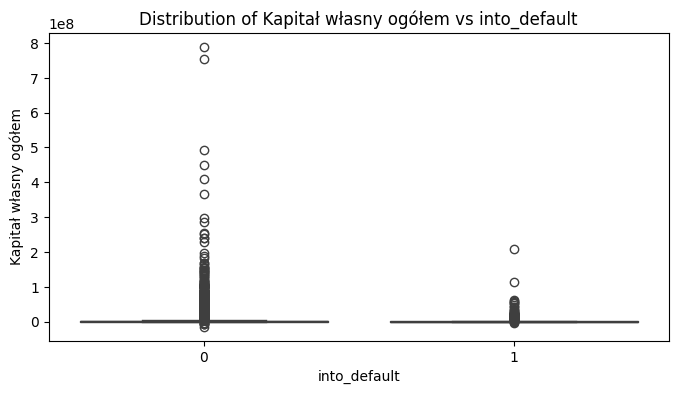

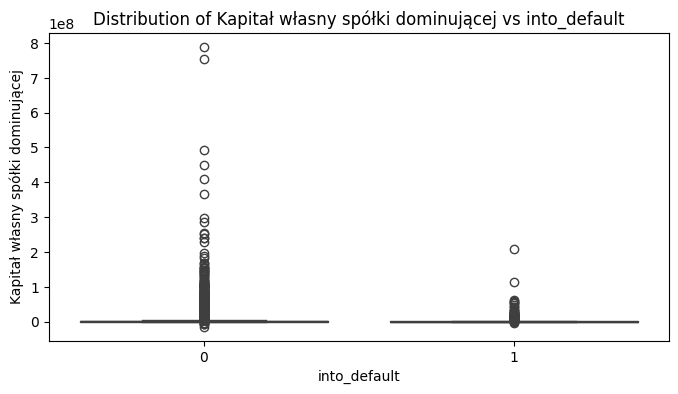

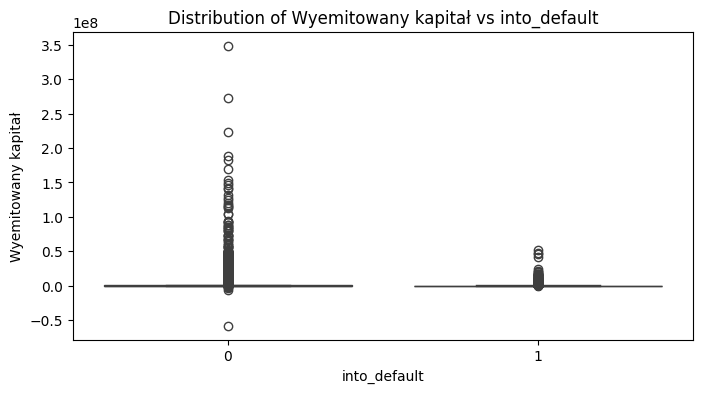

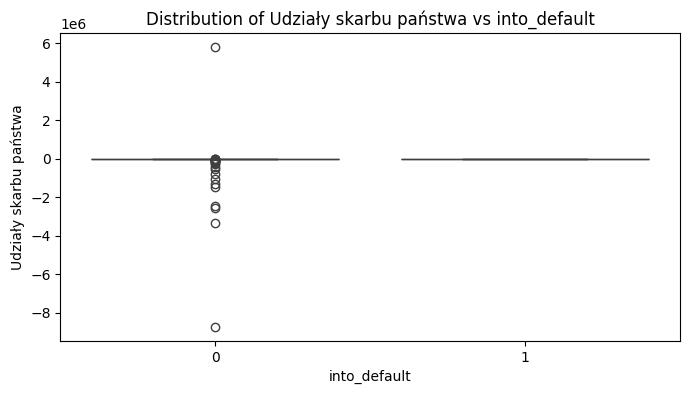

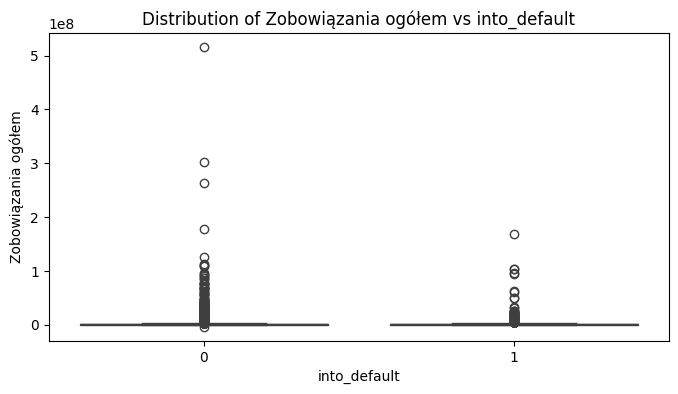

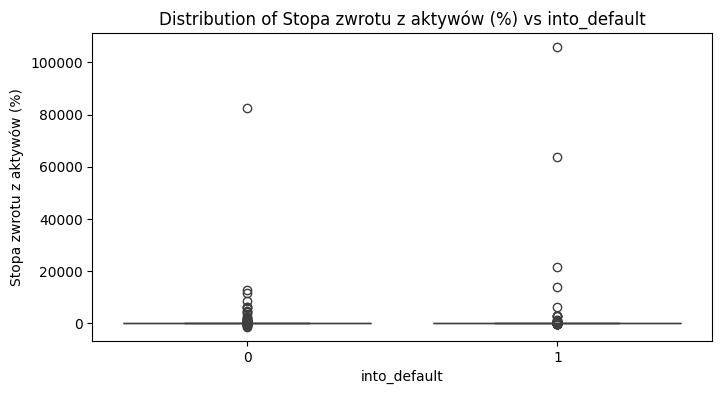

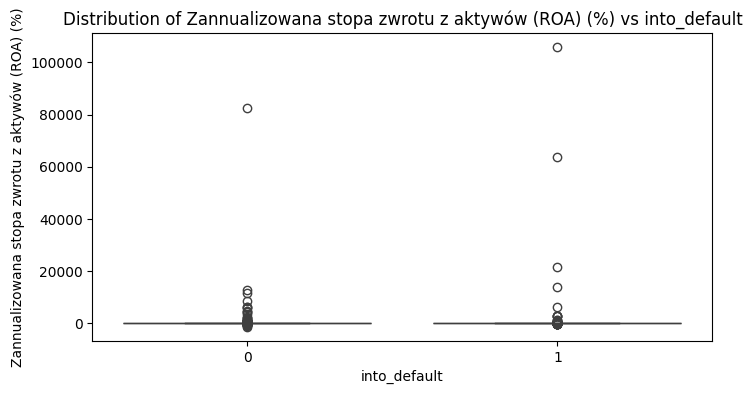

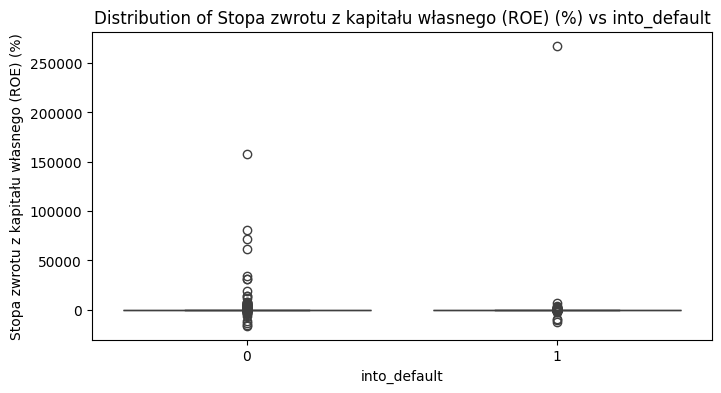

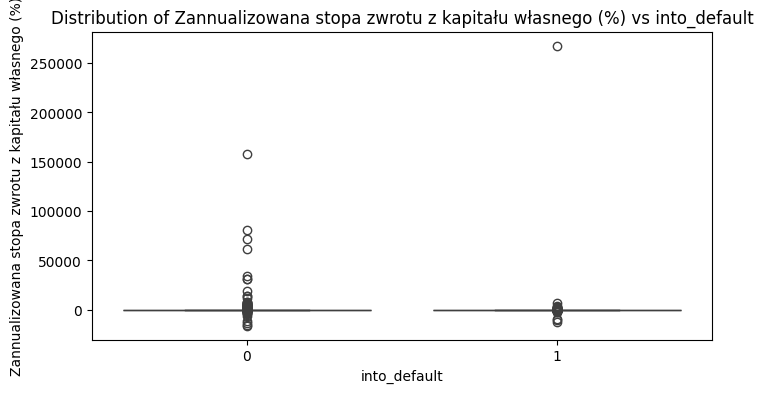

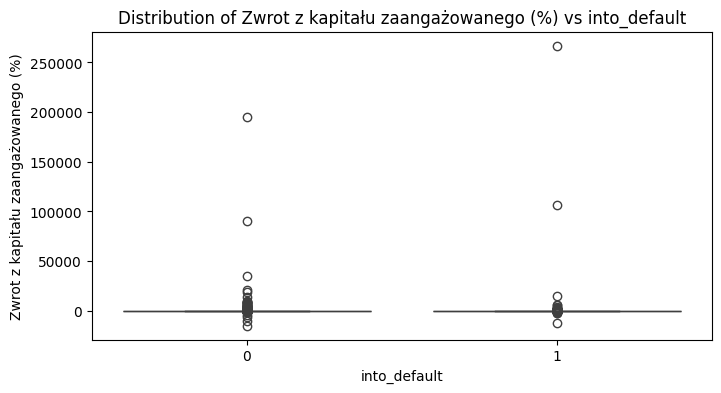

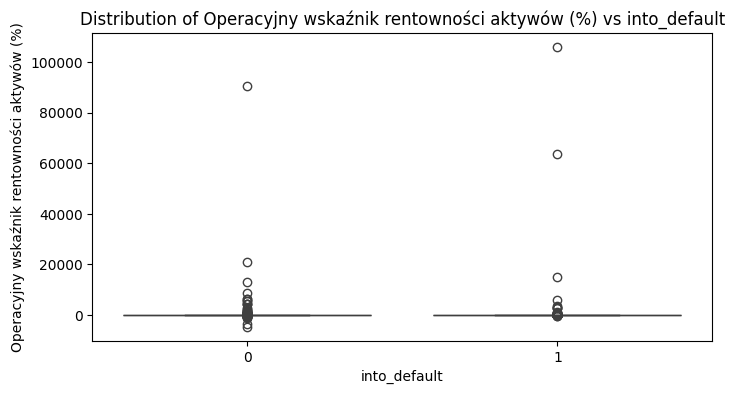

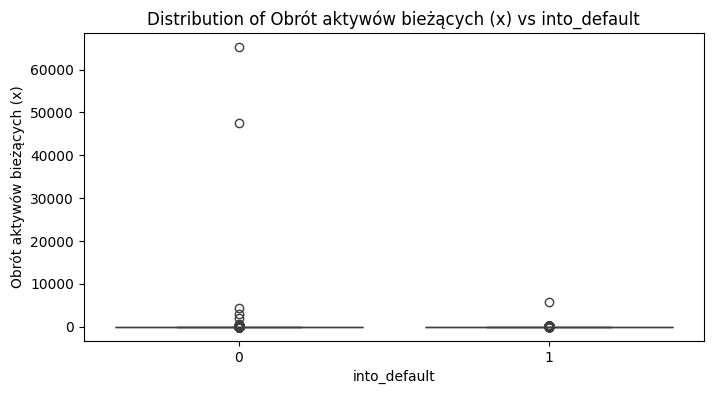

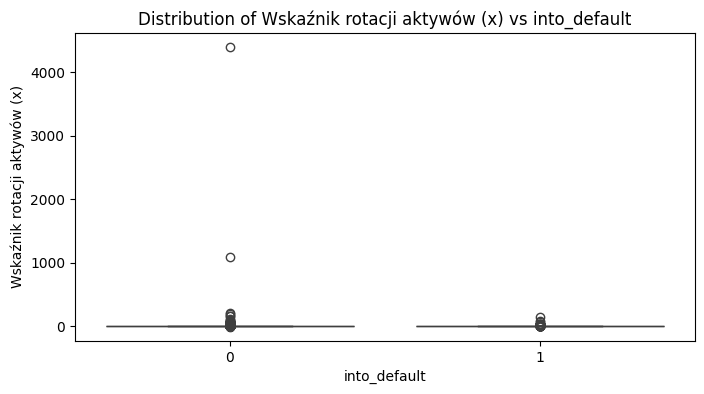

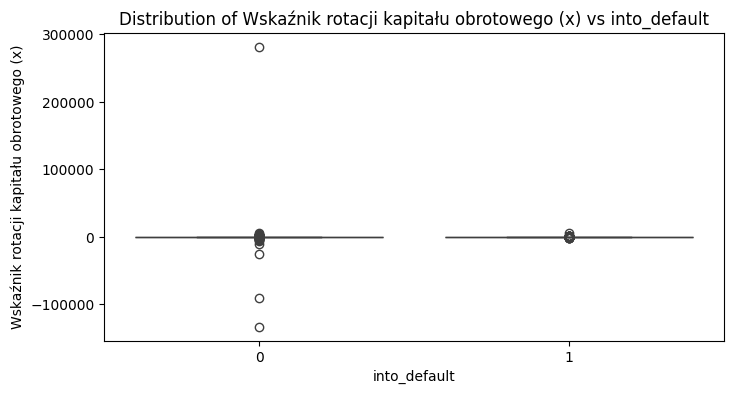

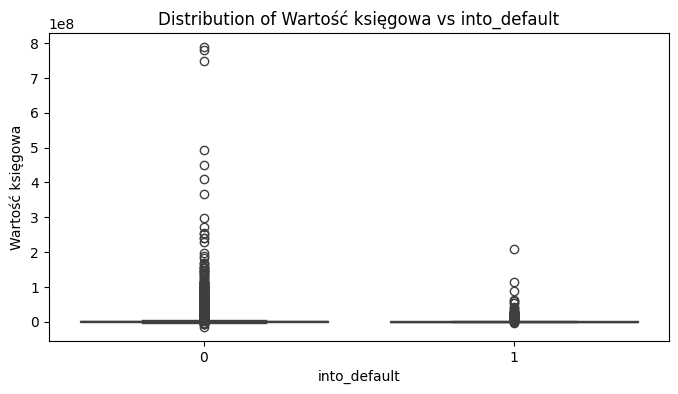

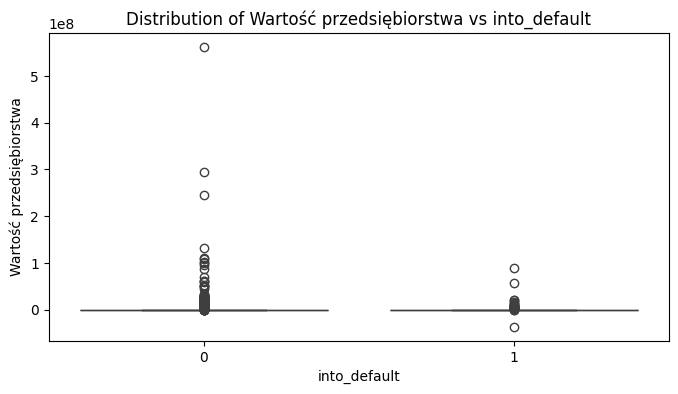

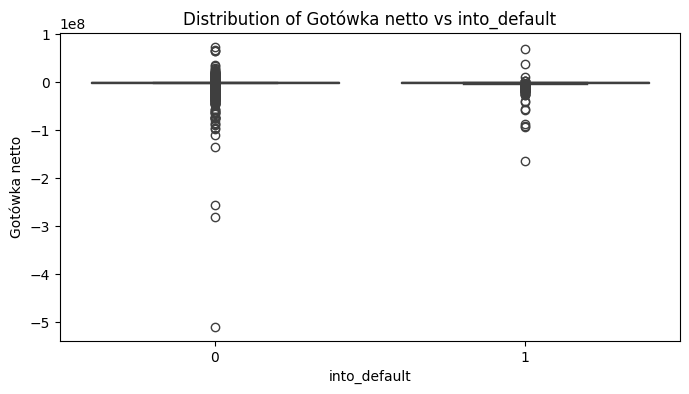

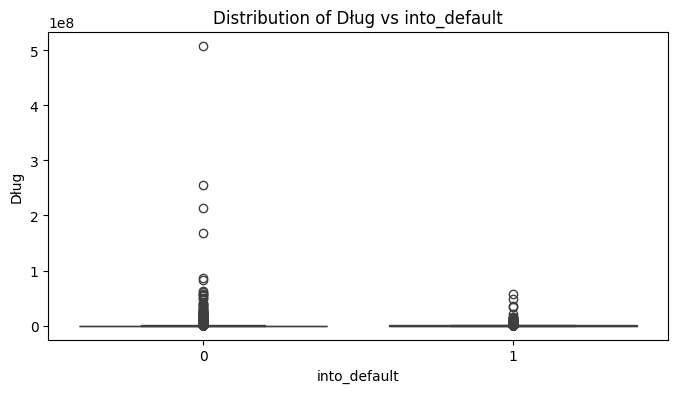

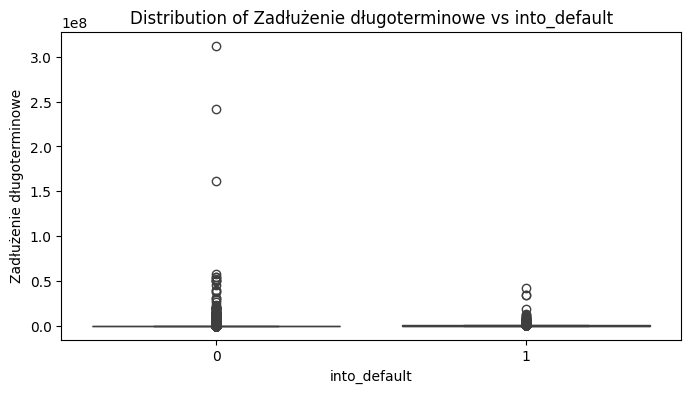

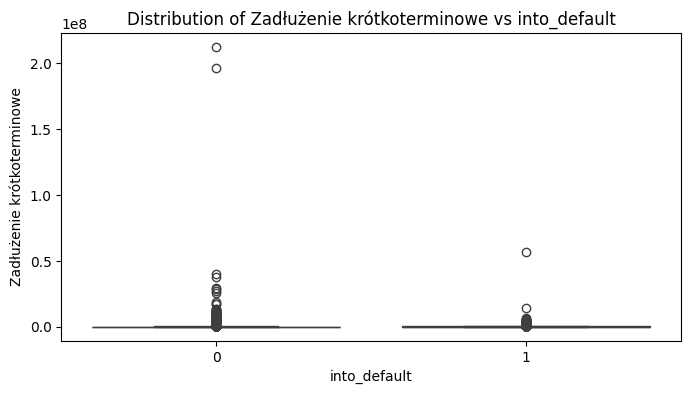

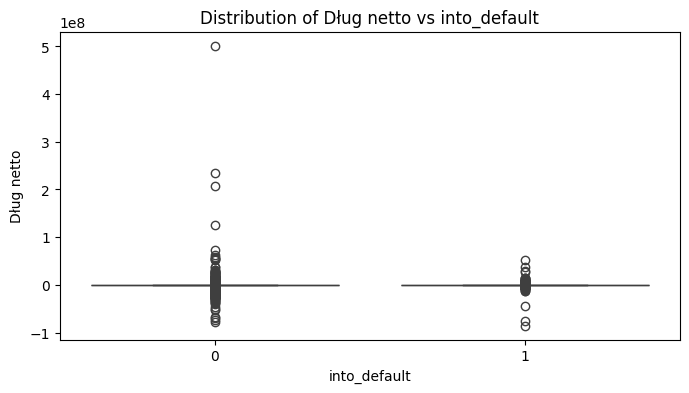

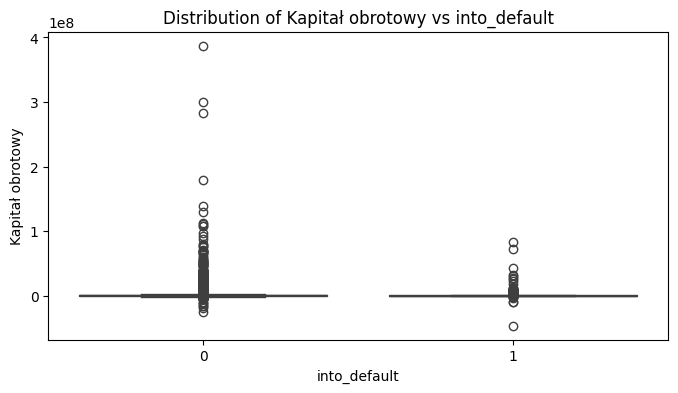

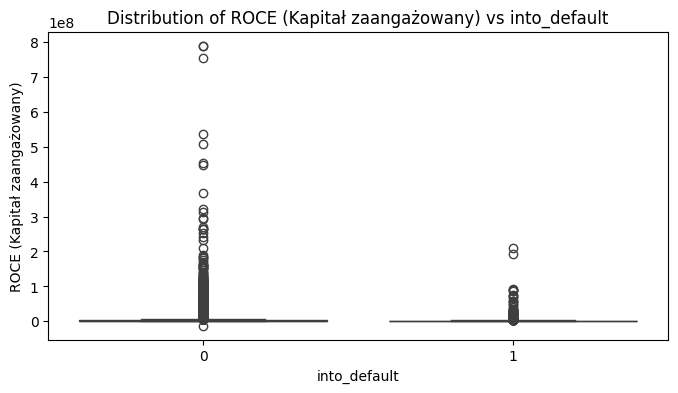

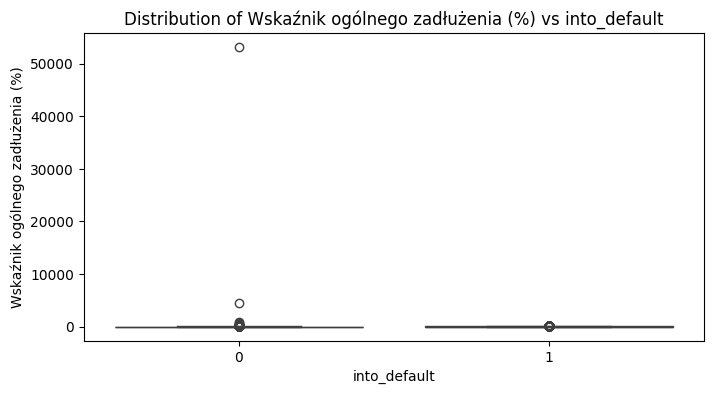

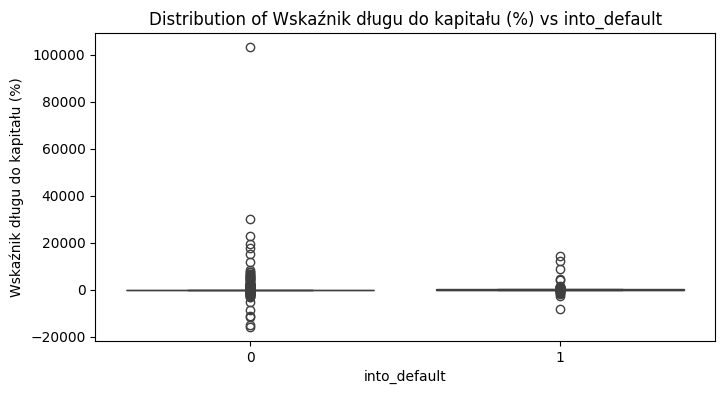

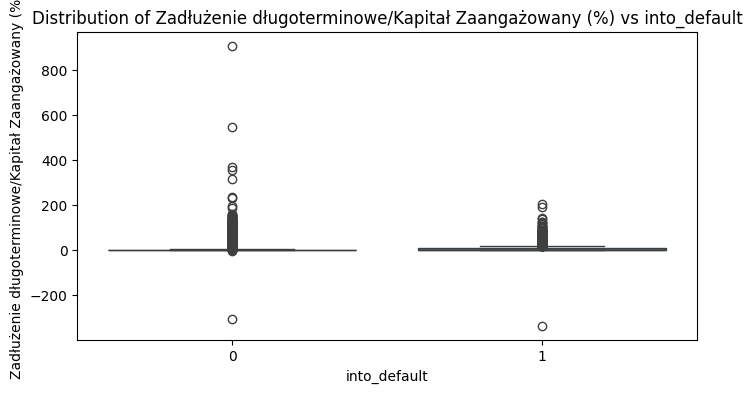

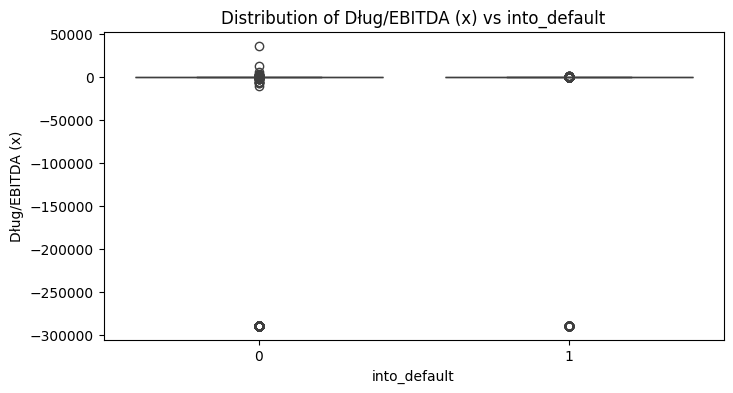

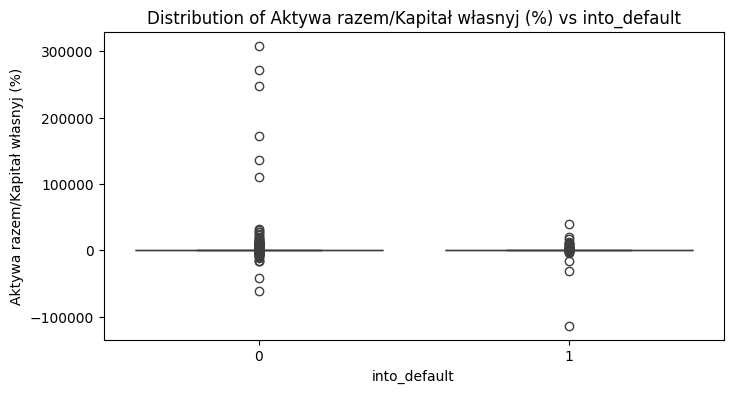

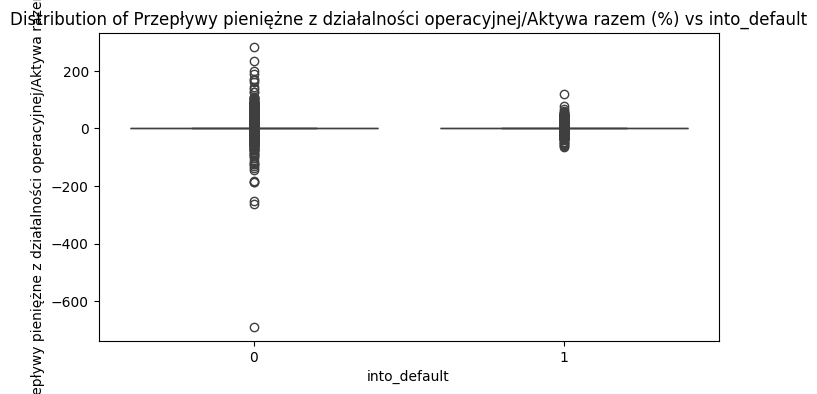

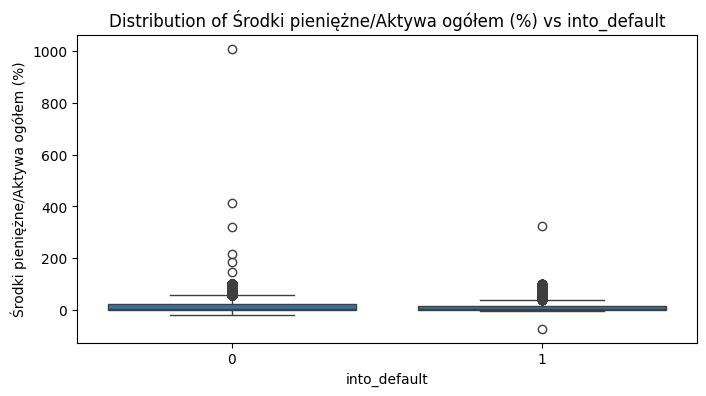

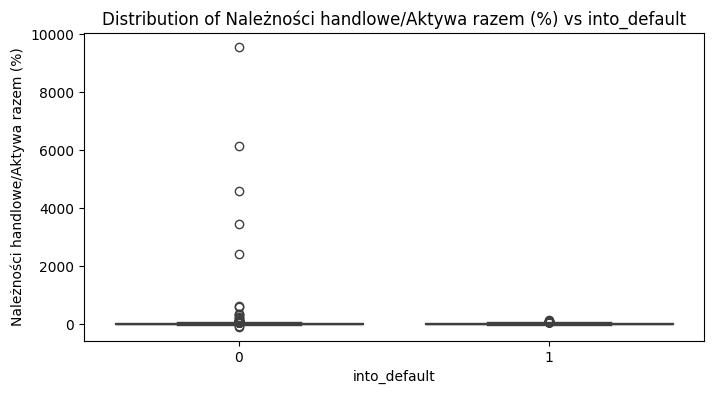

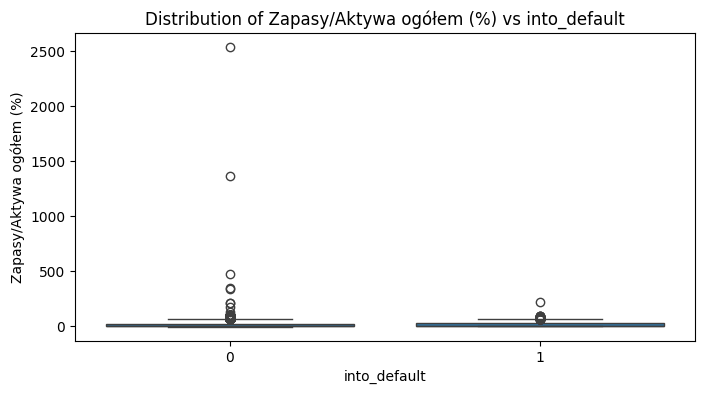

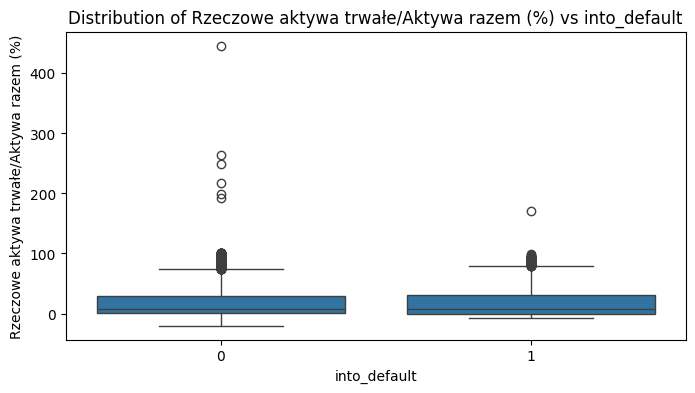

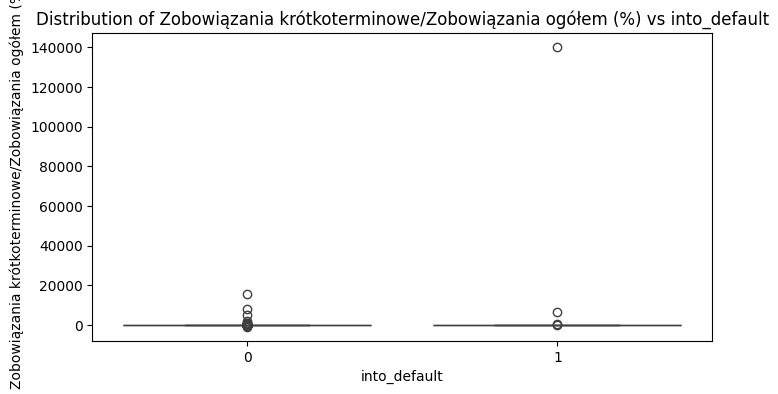

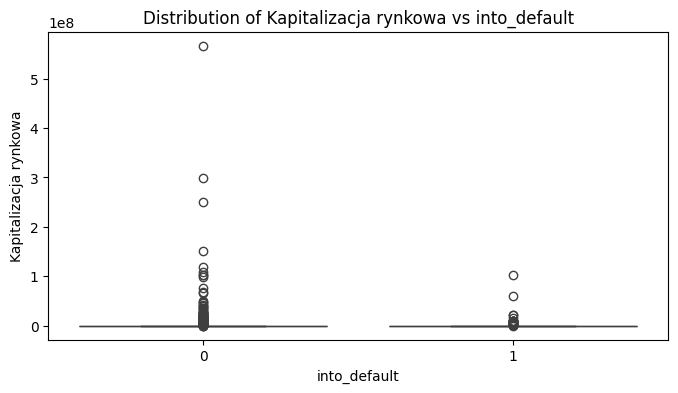

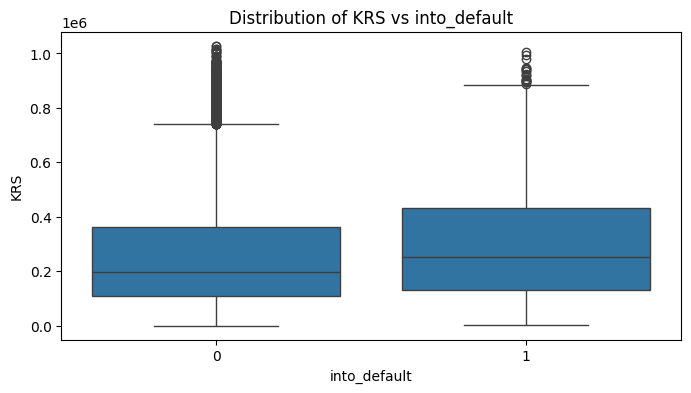

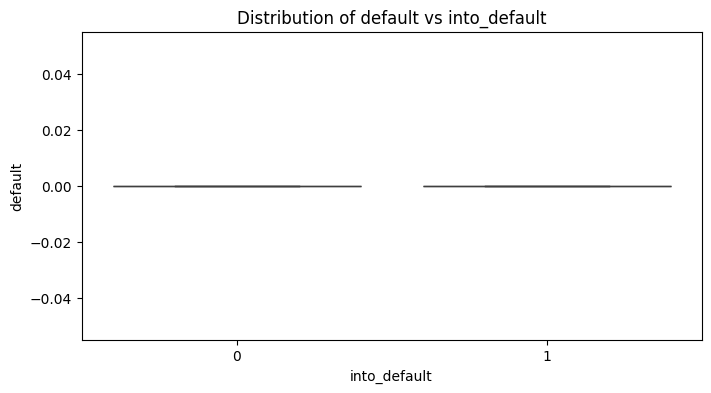

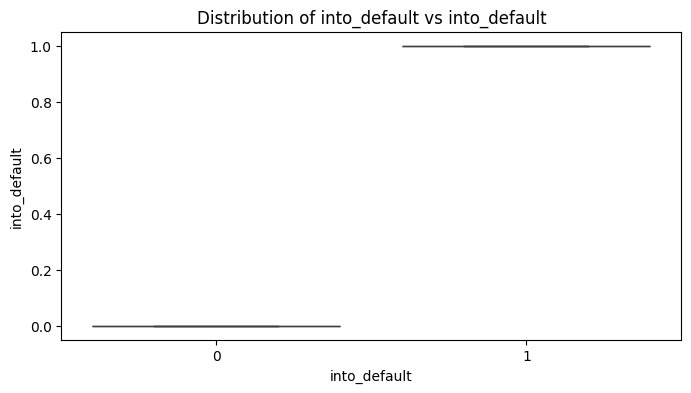

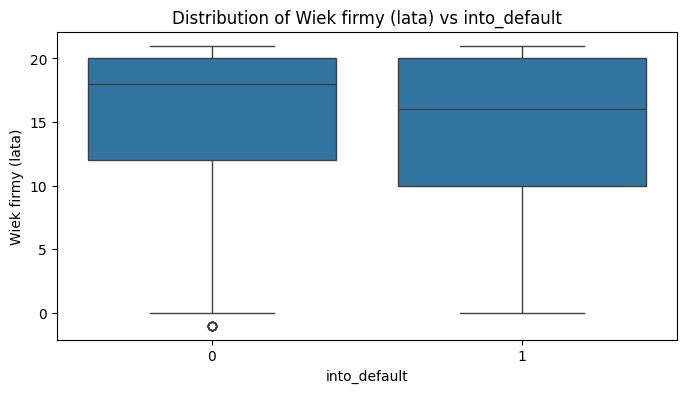

In [9]:
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='into_default', y=col, data=df)
    plt.title(f'Distribution of {col} vs into_default')
    plt.show()

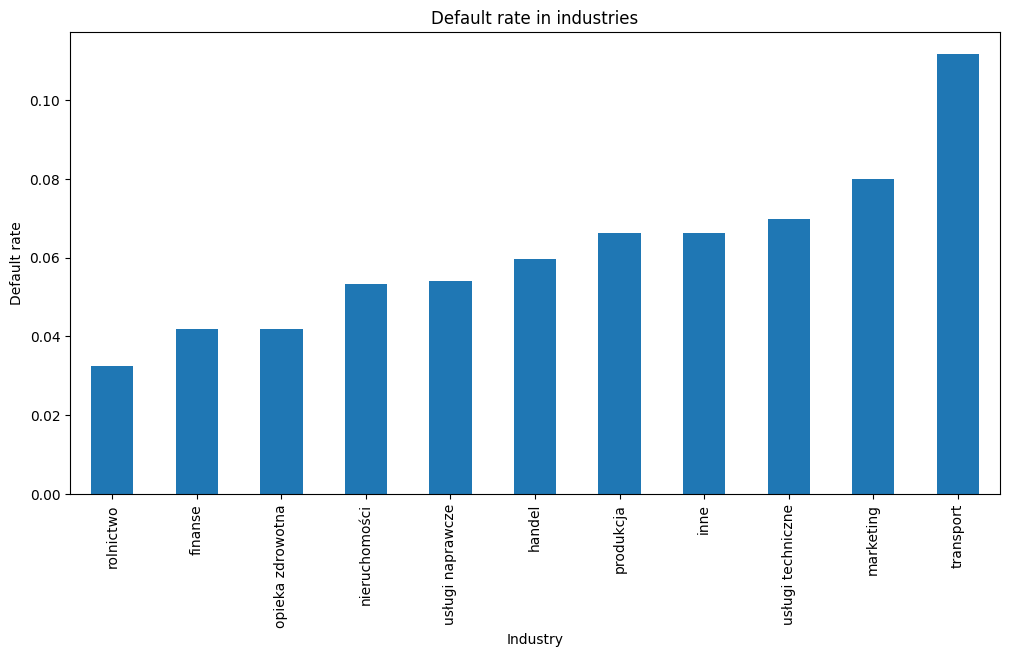

In [10]:
# Industry vs default analysis
plt.figure(figsize=(12, 6))
default_by_industry = df.groupby('Industry')['into_default'].mean().sort_values()
default_by_industry.plot(kind='bar')
plt.title('Default rate in industries')
plt.xlabel('Industry')
plt.ylabel('Default rate')
plt.show()

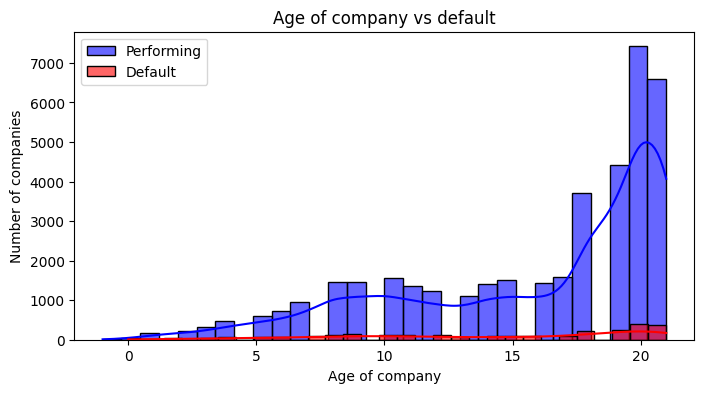

In [11]:
# Age of company vs default
plt.figure(figsize=(8, 4))
sns.histplot(df[df['into_default'] == 0]['Wiek firmy (lata)'], bins=30, label='Performing', kde=True, color='blue', alpha=0.6)
sns.histplot(df[df['into_default'] == 1]['Wiek firmy (lata)'], bins=30, label='Default', kde=True, color='red', alpha=0.6)
plt.legend()
plt.title("Age of company vs default")
plt.xlabel("Age of company")
plt.ylabel("Number of companies")
plt.show()

/var/folders/jc/g3l_18kj0p531mjqr1b2z9y80000gn/T/ipykernel_30420/2498347611.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['into_default'] == 0][var], label='Performing', shade=True, color='blue')
/var/folders/jc/g3l_18kj0p531mjqr1b2z9y80000gn/T/ipykernel_30420/2498347611.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['into_default'] == 1][var], label='Default', shade=True, color='red')


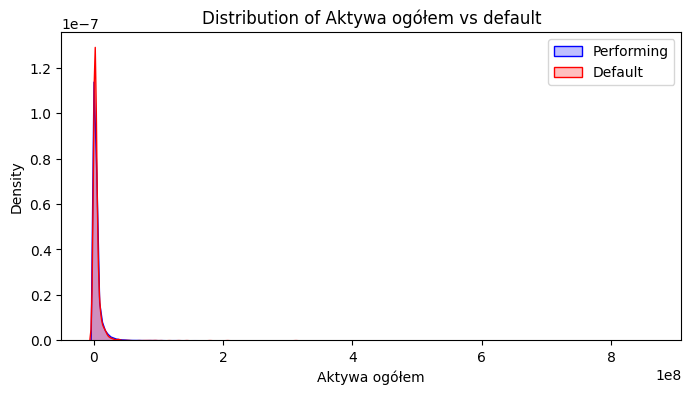

/var/folders/jc/g3l_18kj0p531mjqr1b2z9y80000gn/T/ipykernel_30420/2498347611.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['into_default'] == 0][var], label='Performing', shade=True, color='blue')
/var/folders/jc/g3l_18kj0p531mjqr1b2z9y80000gn/T/ipykernel_30420/2498347611.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['into_default'] == 1][var], label='Default', shade=True, color='red')


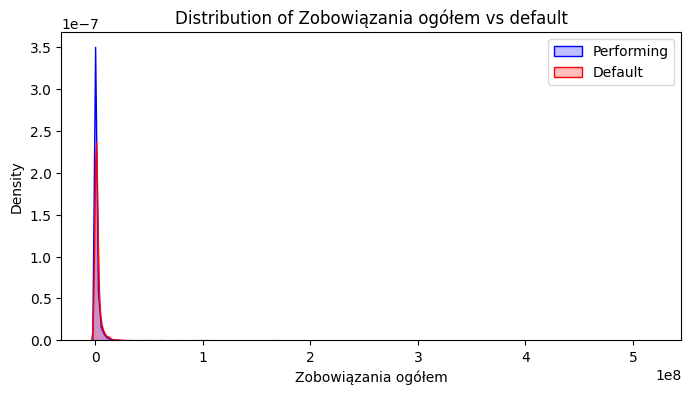

/var/folders/jc/g3l_18kj0p531mjqr1b2z9y80000gn/T/ipykernel_30420/2498347611.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['into_default'] == 0][var], label='Performing', shade=True, color='blue')
/var/folders/jc/g3l_18kj0p531mjqr1b2z9y80000gn/T/ipykernel_30420/2498347611.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['into_default'] == 1][var], label='Default', shade=True, color='red')


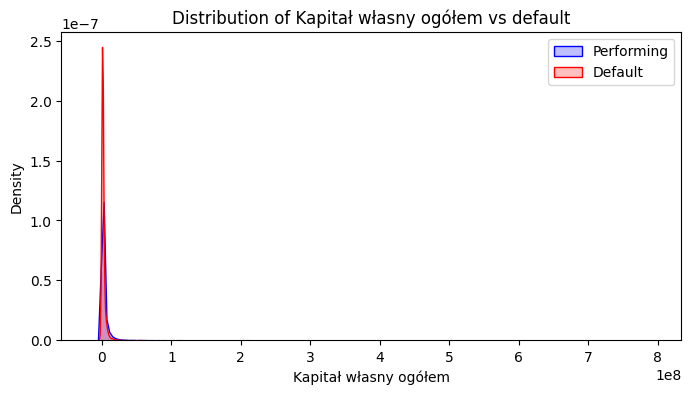

/var/folders/jc/g3l_18kj0p531mjqr1b2z9y80000gn/T/ipykernel_30420/2498347611.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['into_default'] == 0][var], label='Performing', shade=True, color='blue')
/var/folders/jc/g3l_18kj0p531mjqr1b2z9y80000gn/T/ipykernel_30420/2498347611.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['into_default'] == 1][var], label='Default', shade=True, color='red')


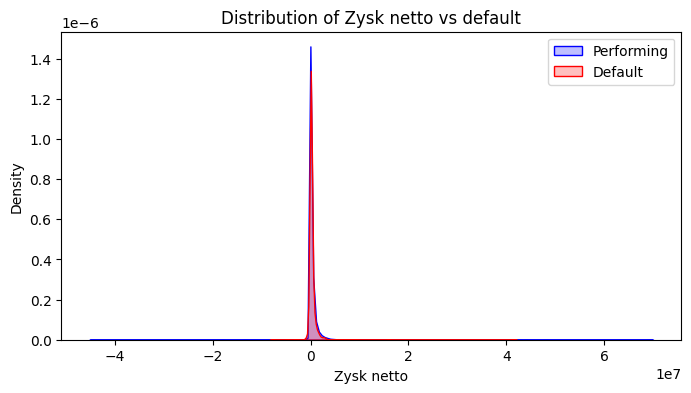

/var/folders/jc/g3l_18kj0p531mjqr1b2z9y80000gn/T/ipykernel_30420/2498347611.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['into_default'] == 0][var], label='Performing', shade=True, color='blue')
/var/folders/jc/g3l_18kj0p531mjqr1b2z9y80000gn/T/ipykernel_30420/2498347611.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['into_default'] == 1][var], label='Default', shade=True, color='red')


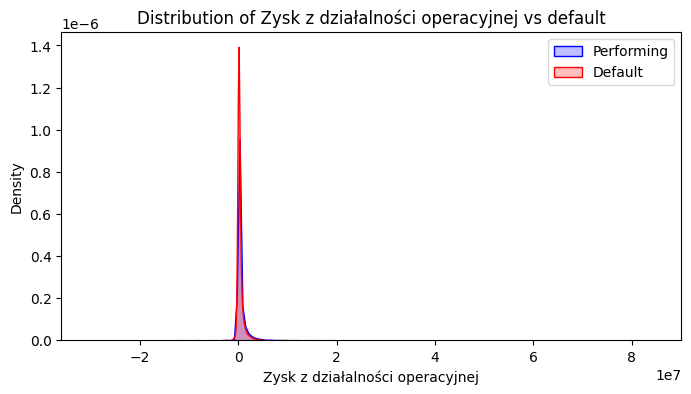

/var/folders/jc/g3l_18kj0p531mjqr1b2z9y80000gn/T/ipykernel_30420/2498347611.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['into_default'] == 0][var], label='Performing', shade=True, color='blue')
/var/folders/jc/g3l_18kj0p531mjqr1b2z9y80000gn/T/ipykernel_30420/2498347611.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['into_default'] == 1][var], label='Default', shade=True, color='red')


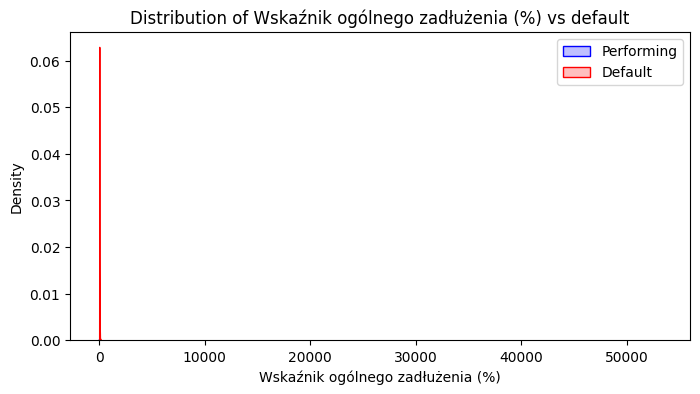

In [12]:
# Financial info vs default 
financial_vars = ['Aktywa ogółem', 'Zobowiązania ogółem', 'Kapitał własny ogółem', 'Zysk netto', 
                  'Zysk z działalności operacyjnej', 'Wskaźnik ogólnego zadłużenia (%)']
for var in financial_vars:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df[df['into_default'] == 0][var], label='Performing', shade=True, color='blue')
    sns.kdeplot(df[df['into_default'] == 1][var], label='Default', shade=True, color='red')
    plt.legend()
    plt.title(f'Distribution of {var} vs default')
    plt.show()

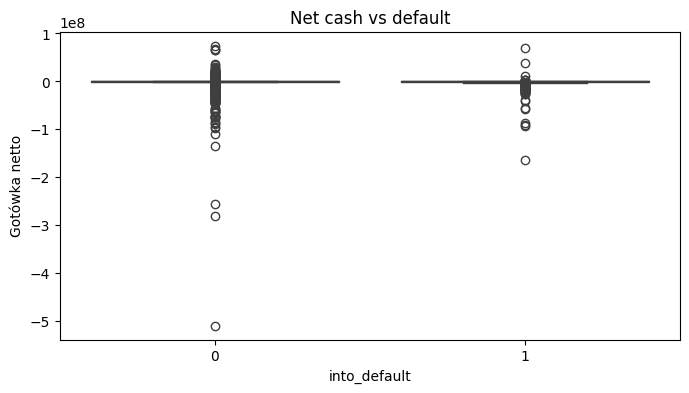

In [13]:
# Liquidity vs default 
plt.figure(figsize=(8, 4))
sns.boxplot(x='into_default', y='Gotówka netto', data=df)
plt.title('Net cash vs default')
plt.show()

In [14]:
# Median of financial info vs default 
summary_stats = df.groupby('into_default')[financial_vars].median()
print("Median of financial info vs default:")
print(summary_stats)

Median of financial info vs default:
              Aktywa ogółem  Zobowiązania ogółem  Kapitał własny ogółem  \
into_default                                                              
0                 1078077.0             271718.0               673714.0   
1                  898778.5             434407.5               369952.5   

              Zysk netto  Zysk z działalności operacyjnej  \
into_default                                                
0               80838.26                          89877.0   
1               39478.13                          51523.5   

              Wskaźnik ogólnego zadłużenia (%)  
into_default                                    
0                                         0.21  
1                                         2.15  


Class distribution for Stan/Województwo:
 into_default                0         1
Stan/Województwo                       
Nieznane             0.908163  0.091837
dolnośląskie         0.938264  0.061736
kujawsko-pomorskie   0.948032  0.051968
lubelskie            0.920471  0.079529
lubuskie             0.933902  0.066098
mazowieckie          0.938105  0.061895
małopolskie          0.933060  0.066940
opolskie             0.935106  0.064894
podkarpackie         0.935361  0.064639
podlaskie            0.931507  0.068493
pomorskie            0.937655  0.062345
warmińsko-mazurskie  0.935453  0.064547
wielkopolskie        0.938843  0.061157
zachodniopomorskie   0.934685  0.065315
łódzkie              0.920824  0.079176
śląskie              0.937711  0.062289
świętokrzyskie       0.932817  0.067183




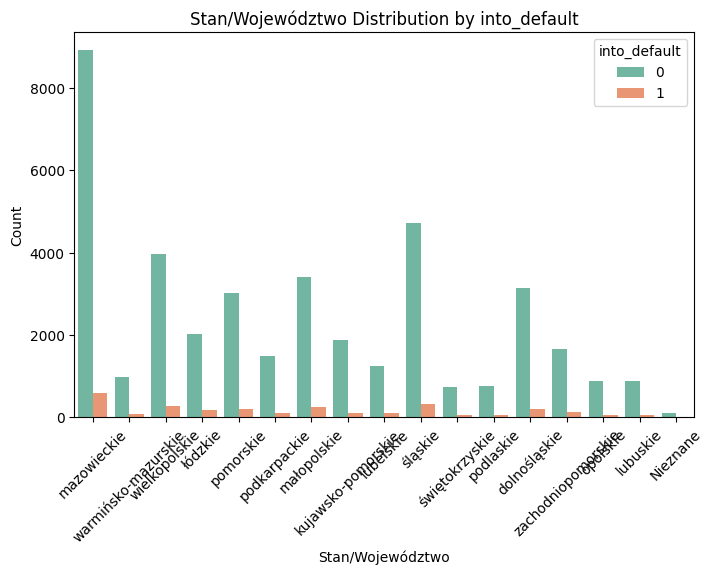

Class distribution for Forma prawna:
 into_default                                    0         1
Forma prawna                                               
Cech Rzemieślniczy                       1.000000  0.000000
Fundacja                                 1.000000  0.000000
Inne                                     1.000000  0.000000
Instytucja rządowa                       0.750000  0.250000
Instytut                                 0.823529  0.176471
Izba Rzemieślnicza                       1.000000  0.000000
Oddział przedsiębiorcy zagranicznego     0.901099  0.098901
Przedsiębiorstwo Państwowe               1.000000  0.000000
Samorząd gospodarczy                     0.916667  0.083333
Spółdzielnia                             0.945115  0.054885
Spółka akcyjna                           0.923315  0.076685
Spółka europejska                        1.000000  0.000000
Spółka jawna                             0.939165  0.060835
Spółka komandytowa                       0.925678  0.074322
Sp

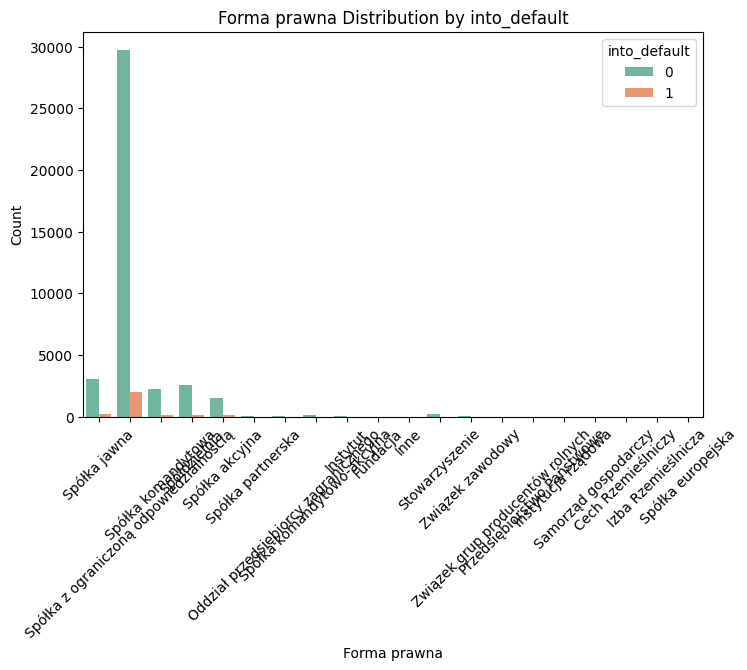

Class distribution for Notowane/Nienotowane:
 into_default                 0         1
Notowane/Nienotowane                    
Niegiełdowe           0.936371  0.063629
Notowana na giełdzie  0.862222  0.137778
Wycofano z notowań    0.862069  0.137931




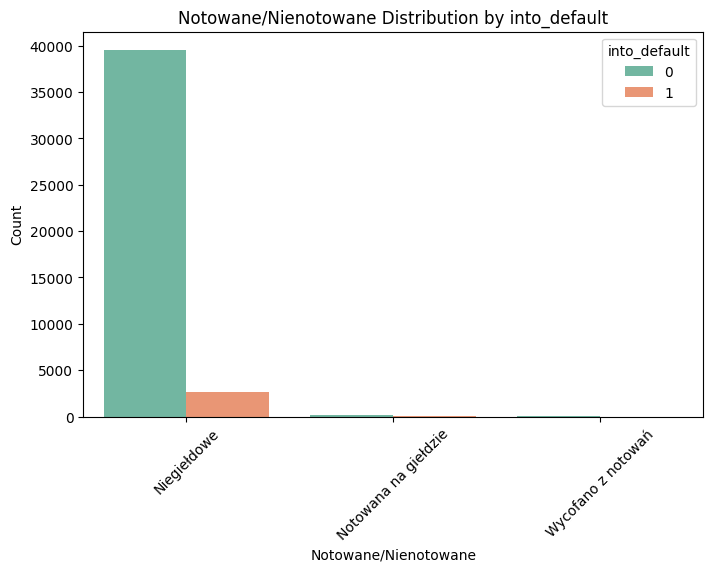

Class distribution for Zaudytowany:
 into_default           0         1
Zaudytowany                       
Niezaudytowany  0.936368  0.063632
Zaudytowany     0.934570  0.065430




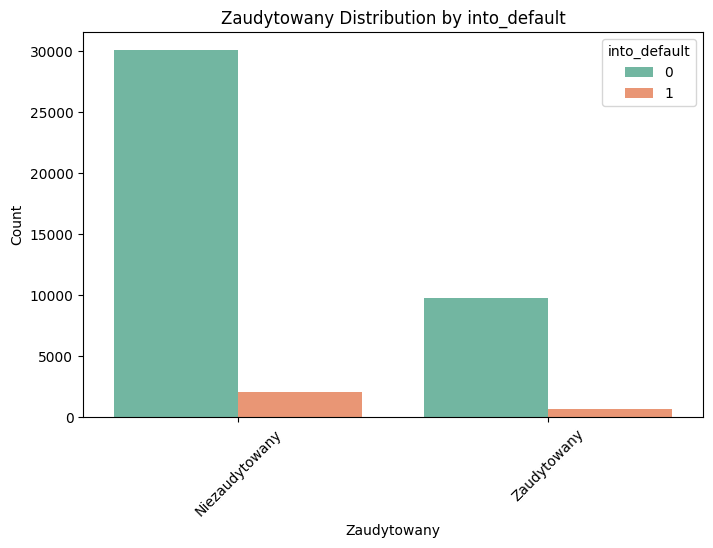

Class distribution for Skonsolidowane:
 into_default           0         1
Skonsolidowane                    
Indywidualnie   0.935975  0.064025
Skonsolidowane  0.930769  0.069231




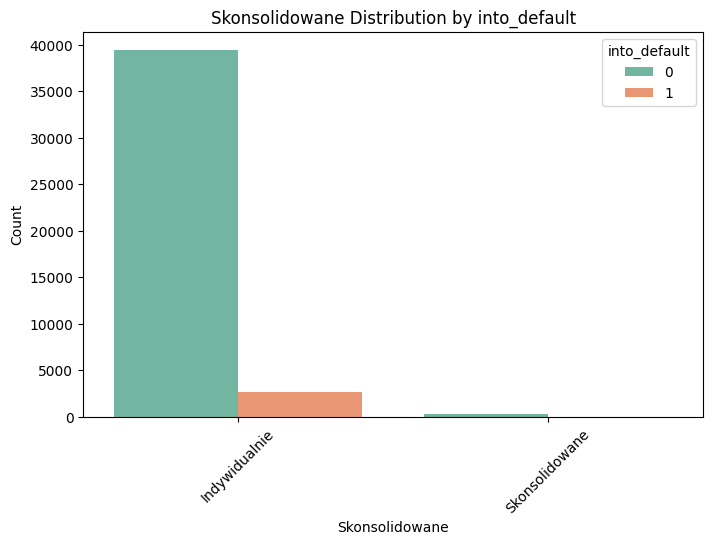

Class distribution for Industry:
 into_default              0         1
Industry                             
finanse            0.958155  0.041845
handel             0.940304  0.059696
inne               0.933712  0.066288
marketing          0.920123  0.079877
nieruchomości      0.946670  0.053330
opieka zdrowotna   0.958091  0.041909
produkcja          0.933797  0.066203
rolnictwo          0.967577  0.032423
transport          0.888347  0.111653
usługi naprawcze   0.945848  0.054152
usługi techniczne  0.930212  0.069788




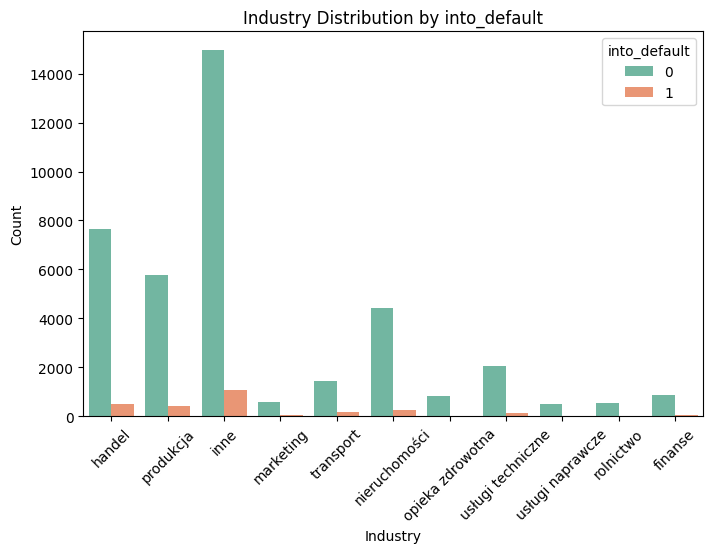

In [15]:
# Comparing the distribution of categorical features across target classes
for col in categorical_features:
    cross_tab = pd.crosstab(df[col], df['into_default'], normalize='index')
    print(f'Class distribution for {col}:\n', cross_tab)
    print("\n")

    # Visualizing the class proportions for each category
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='into_default', data=df, palette='Set2')
    plt.title(f'{col} Distribution by into_default')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()